# Sequential Flatten + Dense

## 00. Imports

In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix

In [2]:
import sys
sys.path.append("../")

In [3]:
from src.activation.relu import ReluLayer
from src.activation.softmax import SoftmaxLayer
from src.layers.dense import DenseLayer
from src.layers.flatten import FlattenLayer
from src.model.sequential import SequentialModel
from src.utils.core import convert_categorical2one_hot, convert_prob2categorical
from src.utils.metrics import calculate_accuracy
from src.optimizers.gradient_descent import GradientDescent
from src.optimizers.rms_prop import RMSProp
from src.optimizers.adam import Adam

## 01. Settings

In [4]:
# number of samples in the train data set
N_TRAIN_SAMPLES = 10000
# number of samples in the test data set
N_TEST_SAMPLES = 1000
# number of samples in the validation data set
N_VALID_SAMPLES = 1000
# number of classes
N_CLASSES = 10
# image size
IMAGE_SIZE = 28

## 02. Build data set

In [5]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
print("trainX shape:", trainX.shape)
print("trainY shape:", trainY.shape)
print("testX shape:", testX.shape)
print("testY shape:", testY.shape)

trainX shape: (60000, 28, 28)
trainY shape: (60000,)
testX shape: (10000, 28, 28)
testY shape: (10000,)


In [6]:
X_train = trainX[:N_TRAIN_SAMPLES, :, :]
y_train = trainY[:N_TRAIN_SAMPLES]

X_test = trainX[N_TRAIN_SAMPLES:N_TRAIN_SAMPLES+N_TEST_SAMPLES, :, :]
y_test = trainY[N_TRAIN_SAMPLES:N_TRAIN_SAMPLES+N_TEST_SAMPLES]

X_valid = testX[:N_VALID_SAMPLES, :, :]
y_valid = testY[:N_VALID_SAMPLES]

**NOTE:** We need to change the data format to the shape supported by my implementation.

In [7]:
X_train = X_train / 255
y_train = convert_categorical2one_hot(y_train)
X_test = X_test / 255
y_test = convert_categorical2one_hot(y_test)
X_valid = X_valid / 255
y_valid = convert_categorical2one_hot(y_valid)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

X_train shape: (10000, 28, 28)
y_train shape: (10000, 10)
X_test shape: (1000, 28, 28)
y_test shape: (1000, 10)
X_valid shape: (1000, 28, 28)
y_valid shape: (1000, 10)


## 03. Build model

In [8]:
layers = [
    FlattenLayer(),
    DenseLayer.initialize(units_prev=IMAGE_SIZE * IMAGE_SIZE, units_curr=1000),
    ReluLayer(),
    DenseLayer.initialize(units_prev=1000, units_curr=1000),
    ReluLayer(),
    DenseLayer.initialize(units_prev=1000, units_curr=500),
    ReluLayer(),
    DenseLayer.initialize(units_prev=500, units_curr=100),
    ReluLayer(),
    DenseLayer.initialize(units_prev=100, units_curr=25),
    ReluLayer(),
    DenseLayer.initialize(units_prev=25, units_curr=N_CLASSES),
    SoftmaxLayer()
]

optimizer = Adam(lr=0.003)

model = SequentialModel(
    layers=layers,
    optimizer=optimizer
)

## 04. Train

In [9]:
model.train(
    x_train=X_train, 
    y_train=y_train, 
    x_test=X_test, 
    y_test=y_test, 
    epochs=30, 
    test_frequency=1
)

Iteration: 00001 - cost: 0.89505 - accuracy: 0.67600
Iteration: 00002 - cost: 0.52590 - accuracy: 0.79100
Iteration: 00003 - cost: 0.50939 - accuracy: 0.80800
Iteration: 00004 - cost: 0.47052 - accuracy: 0.84000
Iteration: 00005 - cost: 0.46983 - accuracy: 0.83500
Iteration: 00006 - cost: 0.45766 - accuracy: 0.85300
Iteration: 00007 - cost: 0.45397 - accuracy: 0.84600
Iteration: 00008 - cost: 0.51136 - accuracy: 0.82000
Iteration: 00009 - cost: 0.40910 - accuracy: 0.87100
Iteration: 00010 - cost: 0.44476 - accuracy: 0.86000
Iteration: 00011 - cost: 0.41550 - accuracy: 0.85700
Iteration: 00012 - cost: 0.42137 - accuracy: 0.86900
Iteration: 00013 - cost: 0.42121 - accuracy: 0.86100
Iteration: 00014 - cost: 0.41881 - accuracy: 0.87100
Iteration: 00015 - cost: 0.44941 - accuracy: 0.85900
Iteration: 00016 - cost: 0.39933 - accuracy: 0.86600
Iteration: 00017 - cost: 0.47780 - accuracy: 0.86100
Iteration: 00018 - cost: 0.47774 - accuracy: 0.84600
Iteration: 00019 - cost: 0.47897 - accuracy: 0

## 05. Predict and examine results

In [10]:
y_hat = model.predict(X_valid)
acc = calculate_accuracy(y_hat, y_valid)
print("acc: ", acc)

acc:  0.841


In [11]:
y_hat = convert_prob2categorical(y_hat)
y_valid = convert_prob2categorical(y_valid)

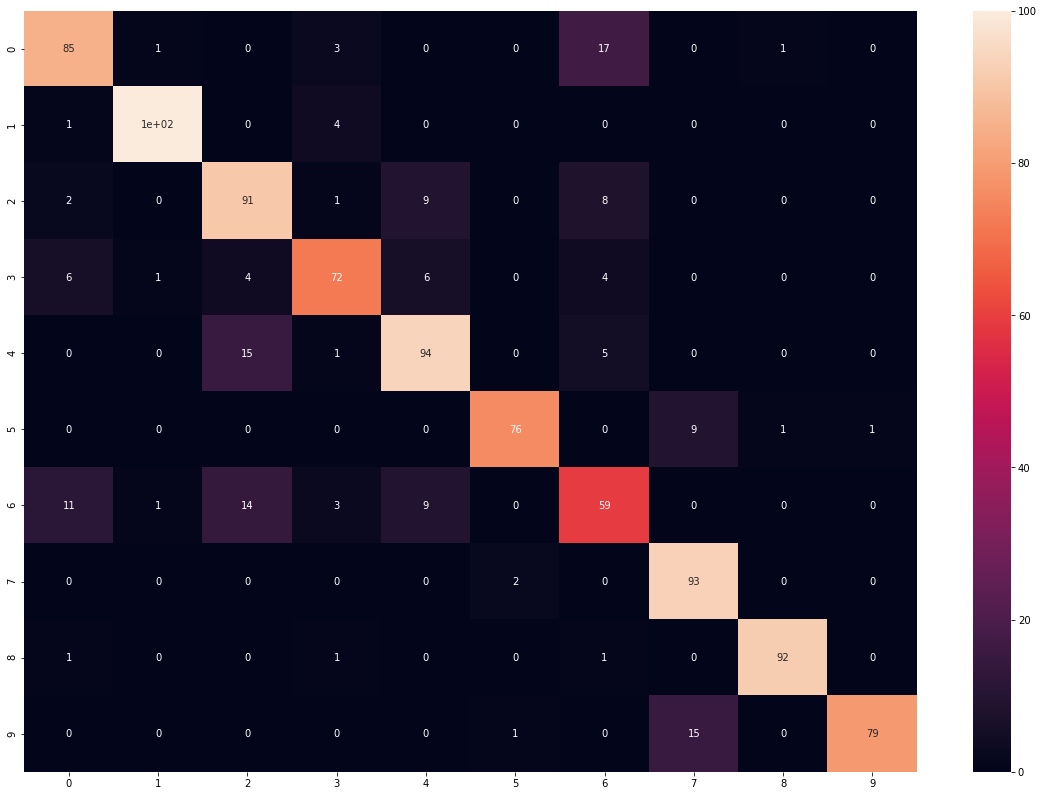

In [12]:
df_cm = pd.DataFrame(
    confusion_matrix(y_valid, y_hat), 
    range(10), 
    range(10)
)
plt.figure(figsize = (20,14))
sn.heatmap(df_cm, annot=True)
plt.show()

In [6]:
import numpy as np
x = np.array([
    [
        [[1, 5]],
        [[2, 2]],
        [[2, 2]],
        [[1, 1]]
    ],
    [
        [[3, 3]],
        [[4, 4]],
        [[0, 3]],
        [[0, 0]]
    ],
    [
        [[5, 2]],
        [[2, 2]],
        [[1, 1]],
        [[1, 1]]
    ],
    [
        [[3, 3]],
        [[4, 4]],
        [[0, 2]],
        [[3, 0]]
    ]
])

In [7]:
x.shape

(4, 4, 1, 2)

In [8]:
x = np.moveaxis(x, -1, 0)
x.shape

(2, 4, 4, 1)

In [9]:
x

array([[[[1],
         [2],
         [2],
         [1]],

        [[3],
         [4],
         [0],
         [0]],

        [[5],
         [2],
         [1],
         [1]],

        [[3],
         [4],
         [0],
         [3]]],


       [[[5],
         [2],
         [2],
         [1]],

        [[3],
         [4],
         [3],
         [0]],

        [[2],
         [2],
         [1],
         [1]],

        [[3],
         [4],
         [2],
         [0]]]])